# KPMG Data Analytics Virtual Internship

A simple solution to the KPMG Data Analytics Virtual Internship:

"*Use the Sprocket data to try to predict which new customers will be the most  will valuable*"


In [1]:
# Data Analysis
import numpy as np
import pandas as pd

# Plotting
import seaborn as sns
from matplotlib import pyplot as plt

#Scaling and Encoding
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

# ML Models
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans

# Tuning
from sklearn.model_selection import cross_val_score

#Filter unnecessary warnings
import warnings
warnings.filterwarnings('ignore')

# set seed for reproducibility
np.random.seed(0)

In [2]:
#import csv into pd - training data
train_data = pd.read_csv('train.csv')

#import csv into pd - test data
test_data = pd.read_csv('test.csv')

train_data.head()

,customer_id,gender,past_3_years_bike_related_purchases,Age,job_title,job_industry_category,wealth_segment,owns_car,tenure,postcode,state,country,property_valuation,R,M,F
0,1,F,93,68.023695,Executive Secretary,Health,Mass Customer,Yes,11.0,2016.0,New South Wales,Australia,10.0,1574.027586,274.371818,93
1,2,Male,81,40.826434,Administrative Officer,Financial Services,Mass Customer,Yes,16.0,2153.0,New South Wales,Australia,10.0,1563.663950,742.086667,81
2,4,Male,33,60.042873,NaN,IT,Mass Customer,No,7.0,4211.0,QLD,Australia,9.0,1606.663950,110.285000,33
3,3,Male,61,67.749722,Recruiting Manager,Property,Mass Customer,Yes,15.0,NaN,NaN,NaN,NaN,1576.663950,420.351250,61
4,5,Female,56,44.423695,Senior Editor,NaN,Affluent Customer,Yes,8.0,2448.0,New South Wales,Australia,4.0,1566.830617,399.156667,56


**1. Data Exploration**

- Understand nature of data (.describe(), .info(), value counts)
- Visual analysis to be completed in Tableau dashboard

**2. Data Preprocessing**

- Data cleaning
     - Imputing data
     - Dropping Null values
- Scaling and encoding

**3. Exploratory Data Analysis**

- Feature engineering - Customer ranking (RFM) features already completed
    - Cluster into value groups

**4. ML Modelling - Classification**
- Model Building

## 1. Data Exploration

In [3]:
#Shapes of the dataset
print("Training data : ", train_data.shape)
print("Test data : ",  test_data.shape)

Training data :  (3999, 16)
Test data :  (1000, 12)


In [4]:
train_data.info()
train_data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 16 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   customer_id                          3999 non-null   int64  
 1   gender                               3999 non-null   object 
 2   past_3_years_bike_related_purchases  3999 non-null   int64  
 3   Age                                  3999 non-null   float64
 4   job_title                            3493 non-null   object 
 5   job_industry_category                3343 non-null   object 
 6   wealth_segment                       3999 non-null   object 
 7   owns_car                             3999 non-null   object 
 8   tenure                               3912 non-null   float64
 9   postcode                             3995 non-null   float64
 10  state                                3995 non-null   object 
 11  country                       

customer_id                              0
gender                                   0
past_3_years_bike_related_purchases      0
Age                                      0
job_title                              506
job_industry_category                  656
wealth_segment                           0
owns_car                                 0
tenure                                  87
postcode                                 4
state                                    4
country                                  4
property_valuation                       4
R                                      508
M                                      508
F                                        0
dtype: int64

In [5]:
test_data.info()
test_data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   gender                               1000 non-null   object 
 1   past_3_years_bike_related_purchases  1000 non-null   int64  
 2   Age                                  983 non-null    float64
 3   job_title                            894 non-null    object 
 4   job_industry_category                835 non-null    object 
 5   wealth_segment                       1000 non-null   object 
 6   owns_car                             1000 non-null   object 
 7   tenure                               1000 non-null   int64  
 8   postcode                             1000 non-null   int64  
 9   state                                1000 non-null   object 
 10  country                              1000 non-null   object 
 11  property_valuation             

gender                                   0
past_3_years_bike_related_purchases      0
Age                                     17
job_title                              106
job_industry_category                  165
wealth_segment                           0
owns_car                                 0
tenure                                   0
postcode                                 0
state                                    0
country                                  0
property_valuation                       0
dtype: int64

- Both job_title and job_industry_category missing a lot of values, to be be filled with 'None'. 
- Tenure and Age are continous data and missing values can be imputed, will need to check distribution if skewed. 
- Missing RFM values to be dropped, too many missing values to impute will skew clustering.

In [6]:
train_data.describe()

,customer_id,past_3_years_bike_related_purchases,Age,tenure,postcode,property_valuation,R,M,F
count,3999.000000,3999.000000,3999.000000,3912.000000,3995.000000,3995.000000,3491.000000,3491.000000,3999.000000
mean,2000.991748,48.887472,45.911081,10.654652,2985.480350,7.513892,1555.041591,555.940943,48.887472
std,1154.570372,28.718151,16.858414,5.658898,844.897454,2.825769,49.082125,237.579014,28.718151
min,1.000000,0.000000,19.579859,1.000000,2000.000000,1.000000,1380.163950,15.080000,0.000000
25%,1001.500000,24.000000,34.967530,6.000000,2200.000000,6.000000,1522.931807,390.271429,24.000000
50%,2001.000000,48.000000,44.459311,11.000000,2768.000000,8.000000,1555.263950,538.853333,48.000000
75%,3000.500000,73.000000,54.652462,15.000000,3750.000000,10.000000,1587.997283,699.749000,73.000000
max,4000.000000,99.000000,121.842873,22.000000,4883.000000,12.000000,1726.663950,1702.550000,99.000000


In [7]:
train_data.describe(include=['O'])

,gender,job_title,job_industry_category,wealth_segment,owns_car,state,country
count,3999,3493,3343,3999,3999,3995,3995
unique,6,195,9,3,2,5,1
top,Female,Business Systems Development Analyst,Manufacturing,Mass Customer,Yes,NSW,Australia
freq,2037,45,799,2000,2024,2052,3995


## 2. Data Preprocessing

In [8]:
train_data = train_data.drop(['customer_id','country'], 1)
test_data = test_data.drop(['country'], 1)

In [9]:
#Shapes of the dataset
print("Training data : ", train_data.shape)
print("Test data : ",  test_data.shape)

Training data :  (3999, 14)
Test data :  (1000, 11)


Dropped country (only 1 unique value) and customer_id (irrelevant to model). Training data should have 3 less features (RFM).

**Sort into Continous or Discrete**

In [10]:
numerical=[features for features in train_data.columns if train_data[features].dtypes!='O']
numerical

['past_3_years_bike_related_purchases',
 'Age',
 'tenure',
 'postcode',
 'property_valuation',
 'R',
 'M',
 'F']

In [11]:
discrete=[feature for feature in numerical if len(train_data[feature].unique())<25] #less than 25 unique values
discrete

['tenure', 'property_valuation']

In [12]:
categorical = [feature for feature in train_data.columns if feature not in numerical]
categorical

['gender',
 'job_title',
 'job_industry_category',
 'wealth_segment',
 'owns_car',
 'state']

In [13]:
categorical = categorical + discrete
categorical

['gender',
 'job_title',
 'job_industry_category',
 'wealth_segment',
 'owns_car',
 'state',
 'tenure',
 'property_valuation']

In [14]:
for i in categorical:
    print(train_data[i].unique())

['F' 'Male' 'Female' 'Femal' 'M' 'U']
['Executive Secretary' 'Administrative Officer' nan 'Recruiting Manager'
 'Senior Editor' 'Media Manager I' 'Business Systems Development Analyst'
 'Nuclear Power Engineer' 'Senior Quality Engineer' 'Developer I'
 'Account Executive' 'Junior Executive' 'Media Manager IV'
 'Sales Associate' 'Professor' 'Geological Engineer' 'Project Manager'
 'Safety Technician I' 'Research Assistant I' 'Accounting Assistant III'
 'Editor' 'Research Nurse' 'Safety Technician III' 'Staff Accountant III'
 'Legal Assistant' 'Product Engineer' 'Information Systems Manager'
 'VP Quality Control' 'Social Worker' 'Senior Cost Accountant'
 'Assistant Media Planner' 'Payment Adjustment Coordinator' 'Food Chemist'
 'Accountant III' 'Director of Sales' 'Senior Financial Analyst'
 'Registered Nurse' 'Biostatistician II' 'Computer Systems Analyst II'
 'Software Test Engineer II' 'Paralegal' 'VP Sales'
 'Chief Design Engineer' 'Office Assistant III'
 'Physical Therapy Assistant' 

**Aggregate Duplicate Values**

In [15]:
train_data['gender'].value_counts()

Female    2037
Male      1872
U           87
M            1
F            1
Femal        1
Name: gender, dtype: int64

In [16]:
datasets = [train_data, test_data]

for i in datasets:
    
    i.loc[i['state'] == 'New South Wales', 'state'] = 'NSW'
    i.loc[i['state'] == 'Victoria', 'state'] = 'VIC'
    i.loc[i['gender'] == 'Femal', 'gender'] = 'Female'
    i.loc[i['gender'] == 'F', 'gender'] = 'Female'
    i.loc[i['gender'] == 'M', 'gender'] = 'Male'

In [17]:
train_data['gender'].value_counts()

Female    2039
Male      1873
U           87
Name: gender, dtype: int64

In [18]:
train_data['state'].value_counts()

NSW    2138
VIC    1021
QLD     836
Name: state, dtype: int64

**Drop null RFM and Geographic values**

In [19]:
train_data = train_data.dropna(subset=['R','F','M'])

train_data = train_data.dropna(subset=['postcode','state','property_valuation'])

In [20]:
train_data.isnull().sum()

gender                                   0
past_3_years_bike_related_purchases      0
Age                                      0
job_title                              421
job_industry_category                  560
wealth_segment                           0
owns_car                                 0
tenure                                  76
postcode                                 0
state                                    0
property_valuation                       0
R                                        0
M                                        0
F                                        0
dtype: int64

**Imputing for Tenure**

<AxesSubplot:xlabel='tenure'>

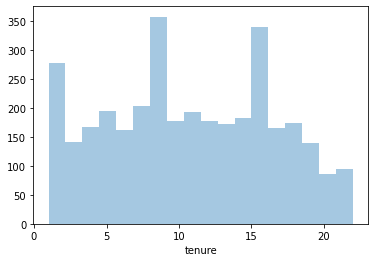

In [21]:
sns.distplot(train_data['tenure'].dropna(), kde=False)

<AxesSubplot:xlabel='Age'>

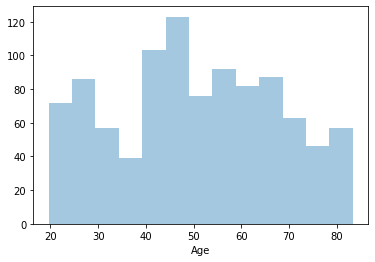

In [22]:
sns.distplot(test_data['Age'].dropna(), kde=False)

Even distribution, will impute with mean.

In [23]:
train_data['tenure'] = train_data['tenure'].fillna(train_data['tenure'].mean())
test_data['tenure'] = test_data['tenure'].fillna(test_data['tenure'].mean())

test_data['Age'] = test_data['Age'].fillna(test_data['Age'].mean())

**Fill all null**

In [24]:
train_data.isnull().sum()

gender                                   0
past_3_years_bike_related_purchases      0
Age                                      0
job_title                              421
job_industry_category                  560
wealth_segment                           0
owns_car                                 0
tenure                                   0
postcode                                 0
state                                    0
property_valuation                       0
R                                        0
M                                        0
F                                        0
dtype: int64

In [25]:
test_data.isnull().sum()

gender                                   0
past_3_years_bike_related_purchases      0
Age                                      0
job_title                              106
job_industry_category                  165
wealth_segment                           0
owns_car                                 0
tenure                                   0
postcode                                 0
state                                    0
property_valuation                       0
dtype: int64

## 3. EDA

**Clustering**

In [26]:
X = train_data[['R','F','M']]

<AxesSubplot:>

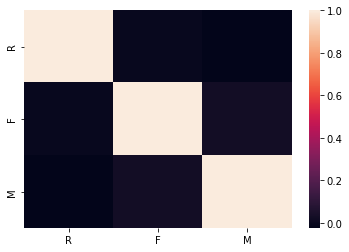

In [27]:
sns.heatmap(X.corr())

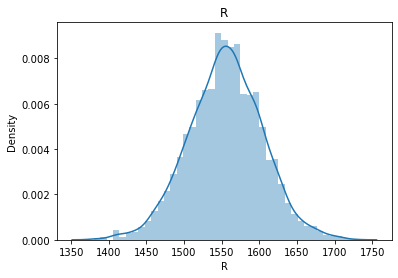

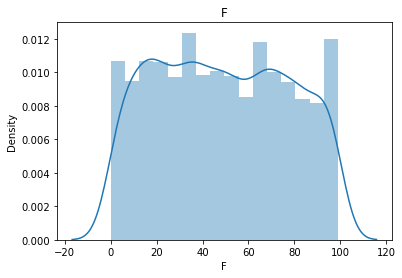

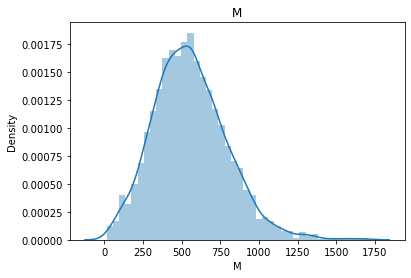

In [28]:
set1 = ['R','F','M']

for i in set1:
    sns.distplot(train_data[i])  
    plt.title(i)
    plt.show()

**Scaling**

In [29]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [51]:
model = KMeans(n_clusters=5, random_state=2).fit(X)

**Determining Optimal Clusters**

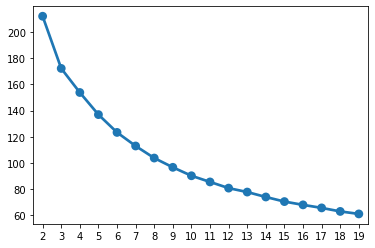

In [31]:
inertia = []
for k in range (2,20):
    kmeans = KMeans(n_clusters=k, random_state=2).fit(X)
    inertia.append(kmeans.inertia_)
    
sns.pointplot(x=list(range(2,20)), y=inertia)
plt.show()

K = 5 should be optimal

In [32]:
rfm_norm = pd.DataFrame(X)
rfm = pd.DataFrame(scaler.inverse_transform(X))
X = train_data[['R','F','M']]
rfm.columns = X.columns
rfm_norm.columns = X.columns
rfm['cluster'] = model.labels_

In [53]:
rfm.groupby('cluster').agg(({
    'R':['mean'],
    'F':['mean'],
    'M':['mean','count'],
}))

#'M':['mean', 'min', 'max', 'count']

R          F           M      
                mean       mean        mean count
cluster                                          
0        1509.491180  78.970492  526.326445   610
1        1555.985086  14.077263  481.030914   906
2        1591.252952  81.686064  619.645817   653
3        1566.988770  47.407090  428.914345   818
4        1542.198593  34.206000  851.166531   500

Cluster 2 can be identified as the most valuable group as it has the highest mean F (highest frequency of purchases) and also the second highest mean M (money spent). Cluster 4 may have the highest mean M but has the second lowest mean F. Mean R(recency) has very little variation between the clusters.

Text(0.5, 0.92, 'RFM Clustering')

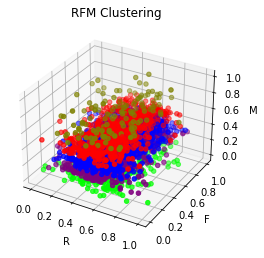

In [52]:
center = model.cluster_centers_
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(rfm_norm['R'], rfm_norm['F'], rfm_norm['M'], cmap = "brg", c=model.predict(X))
#ax.scatter(center[:, 0], center[:, 1], c='black');
ax.set_xlabel("R")
ax.set_ylabel("F")
ax.set_zlabel("M")
plt.title("RFM Clustering")

## 4. ML Modelling

In [35]:
train_data['tenure'].astype(str)
train_data['property_valuation'].astype(str)
train_data['postcode'].astype(str)

test_data['tenure'].astype(str)
test_data['property_valuation'].astype(str)
test_data['postcode'].astype(str)


0      4500
1      2113
2      3505
3      4814
4      2093
       ... 
995    2200
996    2196
997    4702
998    4215
999    2010
Name: postcode, Length: 1000, dtype: object

In [36]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3487 entries, 0 to 3498
Data columns (total 14 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   gender                               3487 non-null   object 
 1   past_3_years_bike_related_purchases  3487 non-null   int64  
 2   Age                                  3487 non-null   float64
 3   job_title                            3066 non-null   object 
 4   job_industry_category                2927 non-null   object 
 5   wealth_segment                       3487 non-null   object 
 6   owns_car                             3487 non-null   object 
 7   tenure                               3487 non-null   float64
 8   postcode                             3487 non-null   float64
 9   state                                3487 non-null   object 
 10  property_valuation                   3487 non-null   float64
 11  R                             

In [37]:
All=[features for features in train_data.columns]
All

['gender',
 'past_3_years_bike_related_purchases',
 'Age',
 'job_title',
 'job_industry_category',
 'wealth_segment',
 'owns_car',
 'tenure',
 'postcode',
 'state',
 'property_valuation',
 'R',
 'M',
 'F']

In [38]:
X_train = train_data[['gender',
 'past_3_years_bike_related_purchases',
 'Age',
 'job_title',
 'job_industry_category',
 'wealth_segment',
 'owns_car',
 'tenure',
 'postcode',
 'state',
 'property_valuation']].copy()

X_test = test_data[['gender',
 'past_3_years_bike_related_purchases',
 'Age',
 'job_title',
 'job_industry_category',
 'wealth_segment',
 'owns_car',
 'tenure',
 'postcode',
 'state',
 'property_valuation']].copy()

y = rfm['cluster'].copy()

In [39]:
y = pd.get_dummies(y)

In [40]:
X_train[['past_3_years_bike_related_purchases','Age']]= StandardScaler().fit_transform(X_train[['past_3_years_bike_related_purchases','Age']])
X_test[['past_3_years_bike_related_purchases','Age']]= StandardScaler().fit_transform(X_test[['past_3_years_bike_related_purchases','Age']])

In [41]:
X_train.isnull().sum()

gender                                   0
past_3_years_bike_related_purchases      0
Age                                      0
job_title                              421
job_industry_category                  560
wealth_segment                           0
owns_car                                 0
tenure                                   0
postcode                                 0
state                                    0
property_valuation                       0
dtype: int64

In [42]:
train_data.fillna('None', inplace=True)
test_data.fillna('None', inplace=True)

In [43]:
encode=OneHotEncoder(handle_unknown='ignore')
X_train=encode.fit_transform(train_data[['gender',
 'past_3_years_bike_related_purchases',
 'Age',
 'job_title',
 'job_industry_category',
 'wealth_segment',
 'owns_car',
 'tenure',
 'postcode',
 'state',
 'property_valuation']])
X_test=encode.transform(test_data[['gender',
 'past_3_years_bike_related_purchases',
 'Age',
 'job_title',
 'job_industry_category',
 'wealth_segment',
 'owns_car',
 'tenure',
 'postcode',
 'state',
 'property_valuation']])

**Final Model**

In [44]:
model = RandomForestClassifier()
model.fit(X_train, y)

RandomForestClassifier()

In [45]:
scores = -1 * cross_val_score(model, X, y,
                              cv=5,
                              scoring='neg_mean_absolute_error')

print("MAE scores:\n", scores)

print("Average MAE score (across experiments):")
print(scores.mean())

MAE scores:
 [1.68452722 2.71146132 2.20086083 2.20200861 2.78737446]
Average MAE score (across experiments):
2.3172464882241943


In [46]:
test = model.predict(X_test)

In [47]:
test = pd.DataFrame(test)
test = test.idxmax(axis=1)

In [48]:
test_data['cluster'] = test

In [49]:
test_data.to_csv('submission.csv', index=False)